In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import cm
import numba
from numba import jit
from IPython.display import Image

The spatiotemporal change for a species over time  can be written as

$$ \frac{\partial \rho}{\partial t} = D \nabla^2 \rho + \alpha(\vec{r}) \rho  - \beta \rho^2$$

where $\rho(\vec{r}, t)$ is the density (in numbers) of a species at position $\vec{r}$ and time $t$. Also specified is $\rho(\vec{r}, 0)$, the distribution of species at the initial time.

* **first term** on the RHS represents the diffusion of a species (i.e. a group of animals spreading out over some biome) with $D$ as the diffusion rate.
* **second term** on RHS is the growth of the species with $\alpha(\vec{r})$ as the abundance of resources at point $\vec{r}$.
* **third term** on RHS represents the death of the species, both through natural causes and from competition between orgamisms.

when multiplying by $\beta$, one obtains this equation (all parameters follow from above):

$$ \frac{\partial u}{\partial t} = D \nabla^2 u + \alpha(\vec{r}) u  - u^2$$

and in one dimension:

$$ \frac{\partial u}{\partial t} = d \frac{\partial^2 u}{\partial x^2} + u(r(x)  - u)$$

Now suppose there are two species with normalized densities $u$ and $v$. The equation above can be adjusted by adding two new values $a$ and $b$: the relative competing strengths of each species. Note that if $a < b$ then species 1 is better at outcompeting species 2. The equations are given by

$$ \frac{\partial u}{\partial t} = d_1 \frac{\partial^2 u}{\partial x^2} + u(r(x) - u  - av) $$

$$ \frac{\partial v}{\partial t} = d_2 \frac{\partial^2 v}{\partial x^2} + v(r(x) - bu  - v) $$

with initial conditions $u(x, 0) = f(x)$ and $v(x, 0) = g(x)$



#### The Question:

What makes one species better at outcompeting another species given a closed boundary with a zero flux condition? (i.e. finite area and animals cannot leave the area). Things to keep in mind

* $a$ and $b$
* $d_1$ and $d_2$
* $f(x)$ and $g(x)$

#### The Finite Difference method

Instead of using $dx$ and $dt$, we make a finite approximation with $\Delta x$ and $\Delta t$, leading to

$$u_i^{m+1} = u_i^m + \frac{d_1 \Delta t}{\Delta x^2} \left( u_{i+1}^m + u_{i-1}^m - 2u_{i}^m \right) + u_i^m \left(r_i - u_i^m - a v_i^m \right) \Delta t$$

$$v_i^{m+1} = v_i^m + \frac{d_2 \Delta t}{\Delta x^2} \left( v_{i+1}^m + v_{i-1}^m - 2v_{i}^m \right) + v_i^m \left(r_i - v_i^m - b u_i^m \right) \Delta t$$

In [25]:
times = np.linspace(0, 140, 200000)

In [26]:
config = 0

if config==0:
    # CONFIG 1 (first one to resources becomes majority)
    times = np.linspace(0, 140, 200000)
    x = np.linspace(-2, 2, 60)
    p1 = np.zeros([len(times), len(x)])
    p2 = np.zeros([len(times), len(x)])
    r = np.exp(-x**2/0.1)
    p1[0] = np.exp(-(x-1.2)**2/0.02)
    p2[0] = np.exp(-(x+1.2)**2/0.02)
    d1 = 0.01
    d2 = 0.01
    a = 1
    b = 1
    
elif config==1:
    # CONFIG 1 (first one to resources becomes majority)
    times = np.linspace(0, 140, 200000)
    x = np.linspace(-2, 2, 60)
    p1 = np.zeros([len(times), len(x)])
    p2 = np.zeros([len(times), len(x)])
    r = np.exp(-x**2/0.1)
    p1[0] = np.exp(-(x-1)**2/0.02)
    p2[0] = np.exp(-(x+1.2)**2/0.02)
    d1 = 0.01
    d2 = 0.01
    a = 1
    b = 1

elif config==2:
    # CONFIG 2 (seems like u2 gonna win but then u1 comes back)
    times = np.linspace(0, 140, 200000)
    x = np.linspace(-2, 2, 60)
    p1 = np.zeros([len(times), len(x)])
    p2 = np.zeros([len(times), len(x)])
    r = np.exp(-x**2/0.1)
    p1[0] = np.exp(-(x-1.2)**2/0.02)
    p2[0] = np.exp(-(x+1.2)**2/0.02)
    d1 = 0.001
    d2 = 0.01
    a = 1
    b = 1


elif config==3:
    # CONFIG 3 (selective advantage will win)
    times = np.linspace(0, 140, 200000)
    x = np.linspace(-2, 2, 60)
    p1 = np.zeros([len(times), len(x)])
    p2 = np.zeros([len(times), len(x)])
    r = np.exp(-x**2/0.1)
    p1[0] = np.exp(-(x-1.2)**2/0.02)
    p2[0] = np.exp(-(x+1.2)**2/0.02)
    d1 = 0.01
    d2 = 0.01
    a = 1
    b = 0.5
    
elif config==4:
    # CONFIG 4 (mixture)
    times = np.linspace(0, 140, 200000)
    x = np.linspace(-2, 2, 60)
    p1 = np.zeros([len(times), len(x)])
    p2 = np.zeros([len(times), len(x)])
    r = np.exp(-x**2/0.1)
    p1[0] = np.exp(-(x-1.2)**2/0.02)
    p2[0] = np.exp(-(x+1.2)**2/0.02)
    d1 = 0.01
    d2 = 0.1
    a = 1
    b = 0.5


dt = np.diff(times)[0]
dx = np.diff(x)[0]

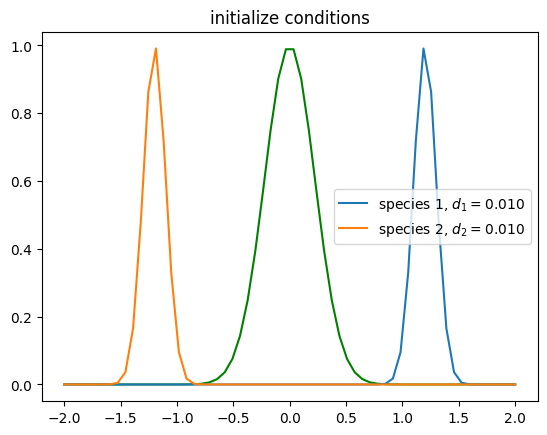

In [27]:
plt.plot(x, r, color='green')
plt.plot(x, p1[0], label=f'species 1, $d_1=${d1:.3f}')
plt.plot(x, p2[0], label=f'species 2, $d_2=${d2:.3f}')
plt.title("initialize conditions")
plt.legend()

In [28]:
dt/dx**2

0.15229451147255718

Apply the finite difference method:

In [29]:
@numba.jit("UniTuple(f8[:,:], 2)(f8[:,:], f8[:,:], f8[:])", nopython=True, nogil=True)
def solve_pop(p1, p2, r):
    for t in range(0,len(times)-1):
        for i in range(0, len(p1[0])):
            # Insulated Boundary Conditions
            if i==0:
                deriv2_1 = 2*p1[t][i+1] - 2*p1[t][i]
                deriv2_2 = 2*p2[t][i+1] - 2*p2[t][i]
            elif i==len(p1[0])-1:
                deriv2_1 =  2*p1[t][i-1] - 2*p1[t][i]
                deriv2_2 =  2*p2[t][i-1] - 2*p2[t][i]
            else:
                deriv2_1 = p1[t][i+1] + p1[t][i-1] - 2*p1[t][i]
                deriv2_2 = p2[t][i+1] + p2[t][i-1] - 2*p2[t][i]
                
            p1[t+1][i] = p1[t][i] + d1*dt/dx**2 * deriv2_1 + \
                         p1[t][i] * dt * (r[i] - p1[t][i] - a*p2[t][i])
            p2[t+1][i] = p2[t][i] + d2*dt/dx**2 * deriv2_2 + \
                         p2[t][i] * dt * (r[i] - p2[t][i] - b*p1[t][i])
            
    return p1, p2

In [30]:
p1, p2 = solve_pop(p1, p2, r)

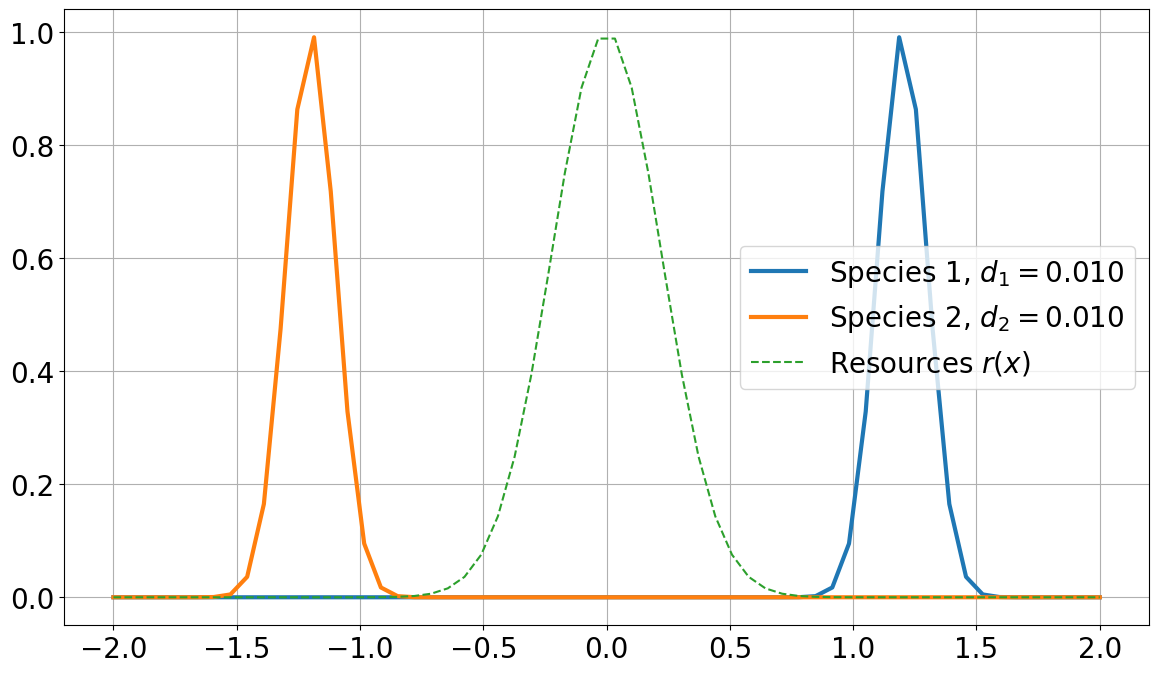

In [31]:
i= 0
plt.figure(figsize=(14,8))
plt.plot(x,p1[i], lw=3, label='Species 1, $d_1=${:.3f}'.format(d1))
plt.plot(x,p2[i], lw=3, label='Species 2, $d_2=${:.3f}'.format(d2))
plt.plot(x,r, ls='--', label='Resources $r(x)$')
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()

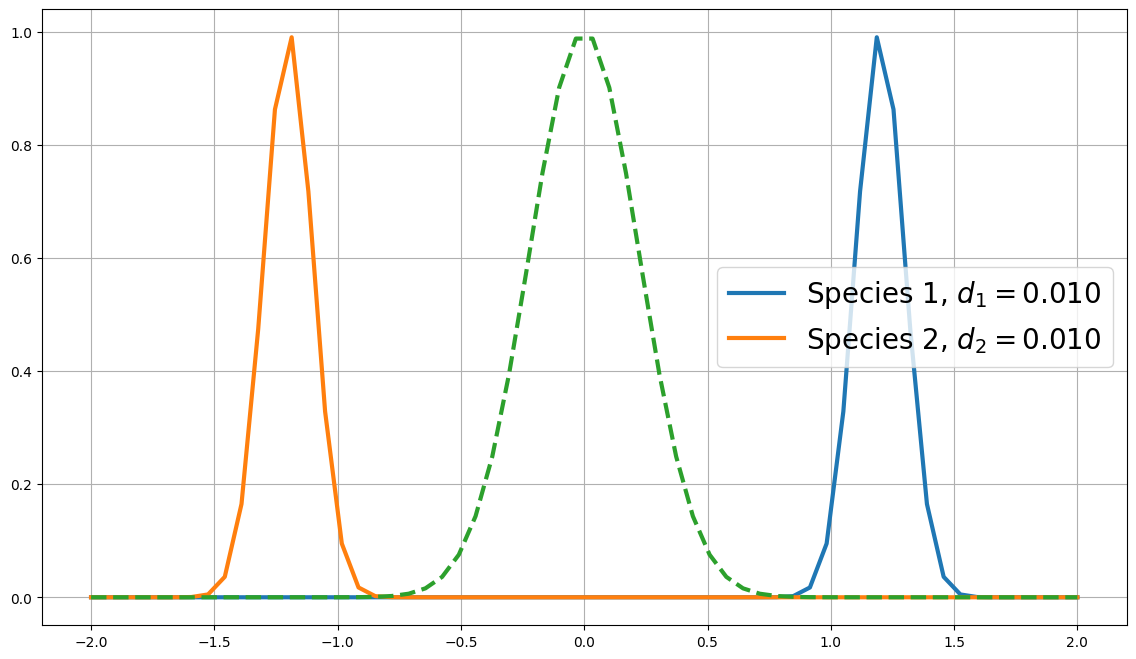

In [32]:
def animate(i):
    line1.set_data(x,p1[500*i])
    line2.set_data(x,p2[500*i])
    line3.set_data(x,r)
    
# Equal aspect ratio Figure with black background and no axes.
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.grid()
line1, = ax.plot(x, p1[0], lw=3, label='Species 1, $d_1=${:.3f}'.format(d1))
line2, = ax.plot(x, p2[0], lw=3, label='Species 2, $d_2=${:.3f}'.format(d2))
line3, = ax.plot(x, r, ls='--', lw=3)
ax.legend(fontsize=20)

ani = animation.FuncAnimation(fig, animate, frames=399, interval=50)
path = '../images/natural_selection.gif'
ani.save(path ,writer='pillow',fps=10)

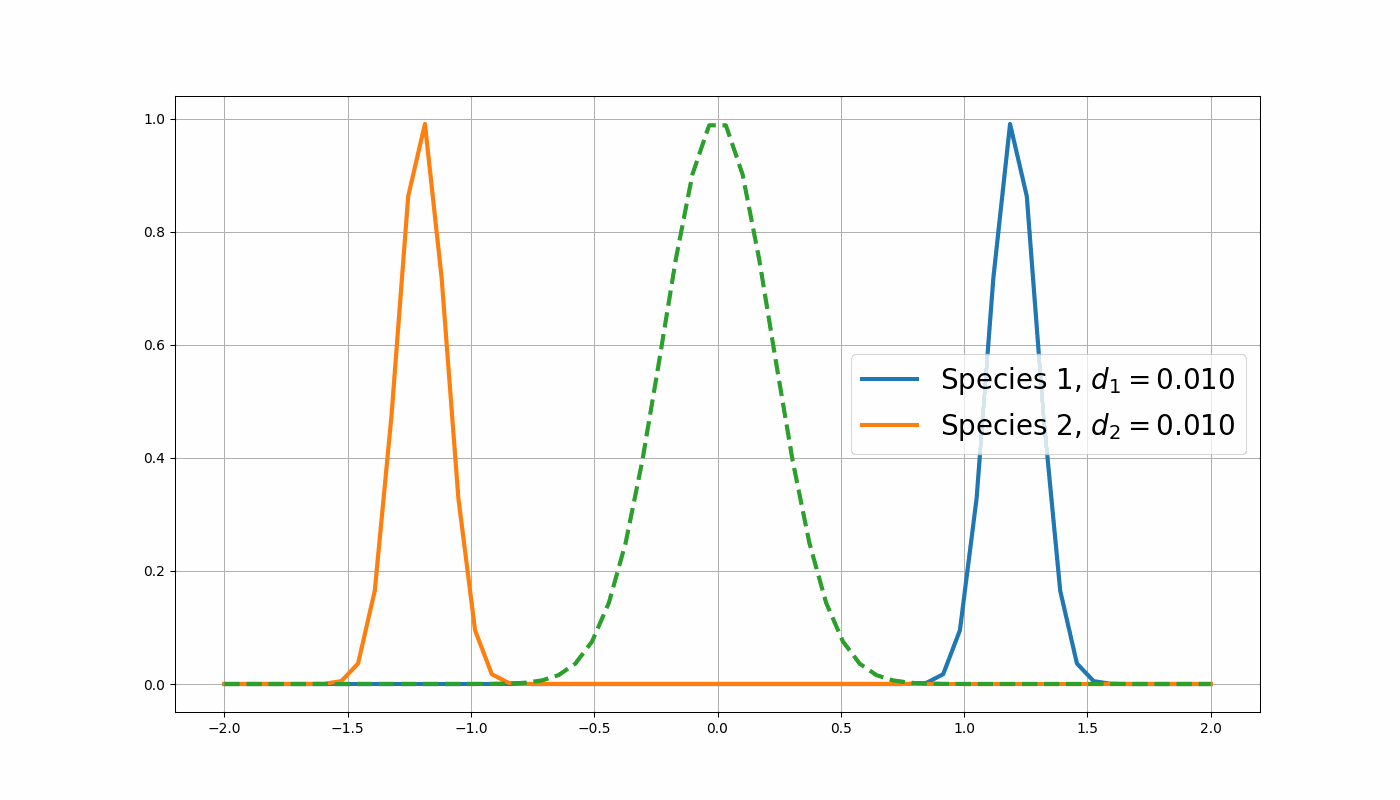

In [34]:
Image(filename = path) 